# This is Udacity ML basic P4 heading line

### 1.1 read the csv file and check & clean the row data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
G_CHILD_AGE = 18
G_UNKNOWN_AGE = -1
tt_file = pd.read_csv("titanic_data.csv", index_col = "PassengerId")
tt_file.head()

Populating the interactive namespace from numpy and matplotlib


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.1 Check overall the survived VS non-survived people

In [2]:

def convert_child_age(df):
    if df.Age < G_CHILD_AGE:
        df.Sex =  'child'
    return df

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/3, 1.03*height, '%d' % int(height))

Survived  Sex   
0         child      52
          female     64
          male      433
1         child      61
          female    195
          male       86
Name: Sex, dtype: int64


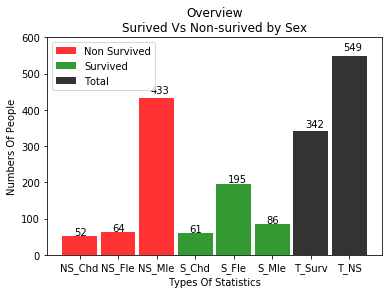

overall male ration 0.582491582492
overall female ration 0.290684624018


([<matplotlib.patches.Wedge at 0x7f1593f750d0>,
 [Text(0.0513046,1.0988,u'non_survived_male'),
  Text(-1.0915,-0.136508,u'non_survived_female'),
  Text(-0.949764,-0.554931,u'non_survived_child'),
  Text(-0.569635,-0.941019,u'survived_male'),
  Text(0.479472,-0.990003,u'survived_female'),
  Text(1.07403,-0.23762,u'survived_child')],
 [Text(0.0279843,0.599347,u'48.51'),
  Text(-0.595362,-0.074459,u'6.93'),
  Text(-0.518053,-0.30269,u'5.94'),
  Text(-0.31071,-0.513283,u'9.90'),
  Text(0.26153,-0.540002,u'21.78'),
  Text(0.585834,-0.129611,u'6.93')])

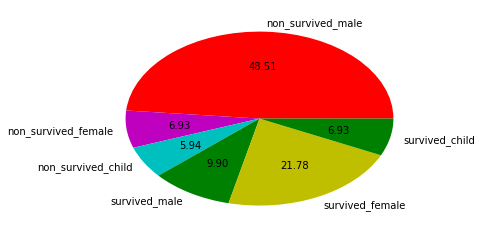

In [3]:
survived_overview = tt_file.apply(convert_child_age, axis=1).groupby(['Survived',"Sex"])['Sex'].count()
print survived_overview
##type(survived_overview)

non_survived_C = survived_overview.iloc[0]
non_survived_F = survived_overview.iloc[1]
non_survived_M = survived_overview.iloc[2]
survived_C = survived_overview.iloc[3]
survived_F = survived_overview.iloc[4]
survived_M = survived_overview.iloc[5]

total_S = survived_F + survived_M + survived_C
total_N = non_survived_F + non_survived_M + non_survived_C
                
y_values = [non_survived_C, non_survived_F, non_survived_M, survived_C, survived_F, survived_M, total_S, total_N]
x_labels = ['NS_Chd', 'NS_Fle','NS_Mle','S_Chd', 'S_Fle','S_Mle','T_Surv', 'T_NS']
bar_width = 0.9

rect1 = plt.bar(x_labels[:3], y_values[:3], label = 'Non Survived', color = 'r', alpha = 0.8, width = bar_width)
rect2 = plt.bar(x_labels[3:6], y_values[3:6], label = 'Survived', color = 'g', alpha = 0.8, width = bar_width)
rect3 = plt.bar(x_labels[6:8], y_values[6:8], label = 'Total', color = 'k', alpha = 0.8, width = bar_width)

plt.xlabel('Types Of Statistics')
plt.ylabel('Numbers Of People')
plt.title('Overview\nSurived Vs Non-surived by Sex')

#plt.xticks(np.arange(7) + bar_width, x_labels)

plt.ylim([0, 600])
    
plt.legend()
autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

plt.show()

male_ratio = [round(float(non_survived_M) / (total_S + total_N), 2), 
              round(float(non_survived_F) / (total_S + total_N), 2),
              round(float(non_survived_C) / (total_S + total_N), 2),
              round(float(survived_M) / (total_S + total_N), 2),
              round(float(survived_F) / (total_S + total_N), 2),
             round(float(survived_C) / (total_S + total_N), 2)]
print "overall male ration", (float(survived_M) + non_survived_M ) / (total_S + total_N)
print "overall female ration", (float(survived_F) + non_survived_F ) / (total_S + total_N)
male_label = ['non_survived_male', 'non_survived_female','non_survived_child', \
              'survived_male', 'survived_female', 'survived_child']
male_ratio_pd = pd.Series(male_ratio, index=male_label)
plt.pie(x=male_ratio, labels=male_label, colors=['r', 'm', 'c', 'g','y','g'], autopct='%.2f')

### 3.1 Consider the age impact from the survived and non-survived people

(20, 30]    146
(30, 40]     86
(10, 20]     71
(40, 50]     53
(0, 10]      26
(50, 60]     25
(60, 70]     13
(70, 80]      4
dtype: int64
(20, 30]    84
(30, 40]    69
(10, 20]    44
(0, 10]     38
(40, 50]    33
(50, 60]    17
(60, 70]     4
(70, 80]     1
dtype: int64
(70, 80]    0.200000
(60, 70]    0.235294
(20, 30]    0.365217
(10, 20]    0.382609
(40, 50]    0.383721
(50, 60]    0.404762
(30, 40]    0.445161
(0, 10]     0.593750
dtype: float64


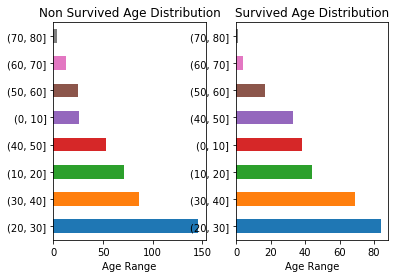

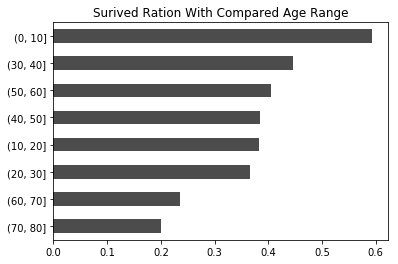

In [56]:

#age_overview = tt_file.groupby(['Survived', 'Age']['Age'].describe()
#print age_overview
def pick_non_sur(df):
    if df.Survived == 0 and not np.isnan(df.Age):
        return df.Age
def pick_sur(df):
    if df.Survived == 1 and not np.isnan(df.Age):
        return df.Age

d_n_array = np.array(tt_file.apply(pick_non_sur, axis=1))
d_s_array = np.array(tt_file.apply(pick_sur, axis=1))
#print dn_array

binsize = [0,10,20,30,40,50,60,70,80]
cat_n = pd.cut(d_n_array, binsize)
cat_s = pd.cut(d_s_array, binsize)
#print dn_array
print pd.value_counts(cat_n, dropna=True)
print pd.value_counts(cat_s, dropna=True)
data_age = ((pd.value_counts(cat_s, dropna=True))/ (pd.value_counts(cat_n, dropna=True) \
                                              + pd.value_counts(cat_s, dropna=True))).sort_values(axis=0,\
                                               ascending=True)
print data_age

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Non Survived Age Distribution')
ax1.set_xlabel('Age Range')
ax1.set_ylim(0, 140)
ax1.set_yticks([20, 40, 60, 80, 100, 120, 140])
pd.value_counts(cat_n, dropna=True, sort=True).plot(kind='barh')

ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Survived Age Distribution')
ax2.set_yticks([20, 40, 60, 80, 100, 120, 140])
ax2.set_ylim(0, 140)
pd.value_counts(cat_s, dropna=True, sort=True).plot(kind='barh')
ax2.set_xlabel('Age Range')

fig, axe = plt.subplots(1, 1)
data_age.plot(kind='barh', ax=axe, color='k', alpha=0.7, \
            title='Surived Ration With Compared Age Range', )

(0, 10]     183
(10, 20]     89
(20, 30]     65
(30, 40]     31
(70, 80]     12
(40, 50]     10
(50, 60]      9
(60, 70]      4
(80, 90]      3
dtype: int64
(10, 20]    66
(20, 30]    55
(0, 10]     46
(50, 60]    22
(30, 40]    20
(70, 80]    18
(80, 90]    12
(60, 70]     6
(40, 50]     4
dtype: int64
(0, 10]     0.200873
(40, 50]    0.285714
(30, 40]    0.392157
(10, 20]    0.425806
(20, 30]    0.458333
(60, 70]    0.600000
(70, 80]    0.600000
(50, 60]    0.709677
(80, 90]    0.800000
dtype: float64


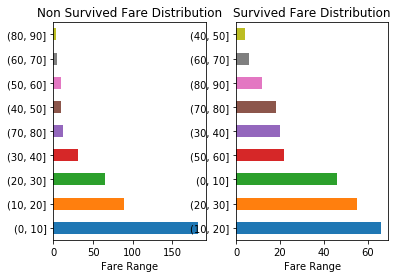

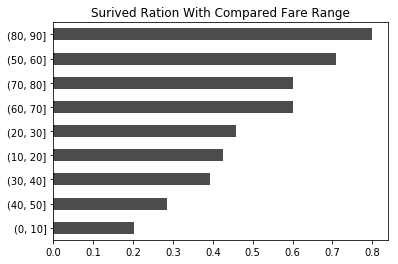

In [60]:
def pick_non_sur(df):
    if df.Survived == 0 and not np.isnan(df.Age):
        return df.Fare
def pick_sur(df):
    if df.Survived == 1 and not np.isnan(df.Age):
        return df.Fare
    
d_n_array = np.array(tt_file.apply(pick_non_sur, axis=1))
d_s_array = np.array(tt_file.apply(pick_sur, axis=1))
#print dn_array

binsize = [0,10,20,30,40,50,60,70,80,90]
cat_n = pd.cut(d_n_array, binsize)
cat_s = pd.cut(d_s_array, binsize)
#print dn_array
print pd.value_counts(cat_n, dropna=True)
print pd.value_counts(cat_s, dropna=True)
data_fare = ((pd.value_counts(cat_s, dropna=True))/ (pd.value_counts(cat_n, dropna=True) \
                                              + pd.value_counts(cat_s, dropna=True))).sort_values(axis=0,\
                                               ascending=True)
print data_fare

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Non Survived Fare Distribution')
ax1.set_xlabel('Fare Range')
ax1.set_ylim(0, 160)
ax1.set_yticks([20, 40, 60, 80, 100, 120, 140])
pd.value_counts(cat_n, dropna=True, sort=True).plot(kind='barh')

ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Survived Fare Distribution')
ax2.set_yticks([20, 40, 60, 80, 100, 120, 140])
ax2.set_ylim(0, 160)
pd.value_counts(cat_s, dropna=True, sort=True).plot(kind='barh')
ax2.set_xlabel('Fare Range')

fig, axe = plt.subplots(1, 1)
data_fare.plot(kind='barh', ax=axe, color='k', alpha=0.7, \
            title='Surived Ration With Compared Fare Range', )

(0, 1]    63
(1, 2]    40
(4, 5]    19
(5, 6]     8
(3, 4]     8
(6, 7]     6
(2, 3]     6
(8, 9]     0
(7, 8]     0
dtype: int64
(0, 1]    76
(1, 2]    53
(2, 3]    21
(5, 6]     4
(4, 5]     3
(3, 4]     3
(8, 9]     0
(7, 8]     0
(6, 7]     0
dtype: int64


Text(0.5,0,u'Family Size Range')

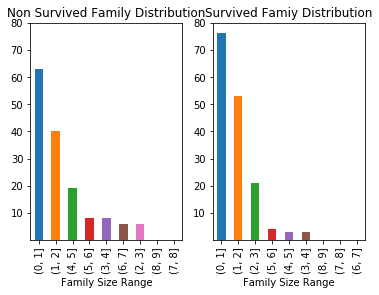

In [58]:
def pick_non_sur(df):
    if df.Survived == 0 and not np.isnan(df.Age):
        return df.SibSp + df.Parch

def pick_sur(df):
    if df.Survived == 1 and not np.isnan(df.Age):
        return df.SibSp + df.Parch
    
d_n_array = np.array(tt_file.apply(pick_non_sur, axis=1))
d_s_array = np.array(tt_file.apply(pick_sur, axis=1))
#print dn_array

binsize = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cat_n = pd.cut(d_n_array, binsize)
cat_s = pd.cut(d_s_array, binsize)
#print dn_array
print pd.value_counts(cat_n, dropna=True)
print pd.value_counts(cat_s, dropna=True)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Non Survived Family Distribution')
ax1.set_xlabel('Family Size Range')
ax1.set_ylim(0, 80)
ax1.set_yticks([10, 20, 30, 40, 50, 60, 70, 80])
pd.value_counts(cat_n, dropna=True, sort=True).plot(kind='bar')

ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Survived Famiy Distribution')
ax2.set_yticks([10, 20, 30, 40, 50, 60, 70, 80])
ax2.set_ylim(0, 80)
pd.value_counts(cat_s, dropna=True, sort=True).plot(kind='bar')
ax2.set_xlabel('Family Size Range')

In [7]:
### 6.1 Consider some field correlations from the survived and non-survived people

Sex         0.54
Age         0.10
Fare        0.26
Pclass      0.34
SibSp       0.04
Parch       0.08
Embarked    0.18
dtype: float64


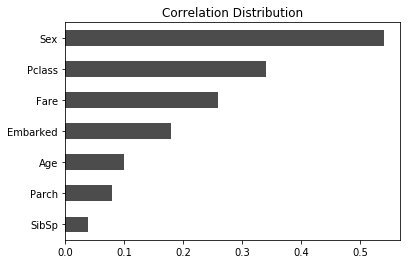

In [51]:

def field_digitization(df):
        if not np.isnan(df.Age):
            if df.Age < 40:
                df.Age = 3
            elif df.Age >= 40 and df.Age < 60:
                df.Age = 2
            elif df.Age >= 60 and df.Age < 80:
                df.Age = 1
            else:
                df.Age = 0
        if not np.isnan(df.Fare):
            df.Fare = int(round(float(df.Fare) / 10, 0))
        #if not np.isnan(df.Sex):
        if df.Sex == 'male':
            df.Sex = 0
        if df.Sex == 'female':
            df.Sex = 1
        #if not np.isnan(df.Embarked):
        if df.Embarked == 'C':
            df.Embarked = 0
        if df.Embarked == 'Q':
            df.Embarked = 1            
        if df.Embarked == 'S':
            df.Embarked = 2 
        
        return df

base_array = np.array(tt_file['Survived'].values)
corr_index = ['Sex', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Embarked']

tt_refined_file = tt_file.apply(field_digitization, axis=1)

#pick up the integer
result_list = []
for field in corr_index:
    new_array = []
    fd_array = np.array(tt_refined_file[field].values) 
    for i in range(len(fd_array)):
        if not np.isnan(fd_array[i]):
            new_array.append(int(str(fd_array[i]).split('.')[0]))
            #print new_array[i]
        else:
            new_array.append(-1) # default as -1
    rst = round(abs(np.corrcoef(base_array, new_array)[1,0]), 2)
    result_list.append(rst)

fig, axe = plt.subplots(1, 1)
data = pd.Series(result_list, index=corr_index)
print data
data.sort_values(axis=0, ascending=True).plot(kind='barh', ax=axe, color='k', alpha=0.7, \
            title='Correlation Distribution', )